In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [8]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

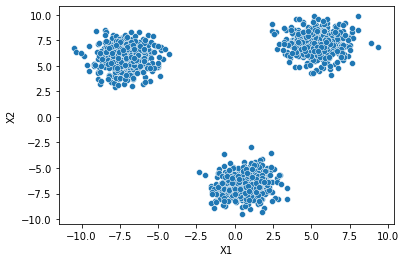

In [9]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [10]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

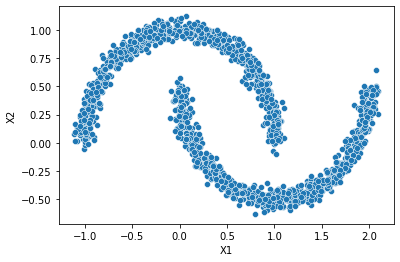

In [11]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [12]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

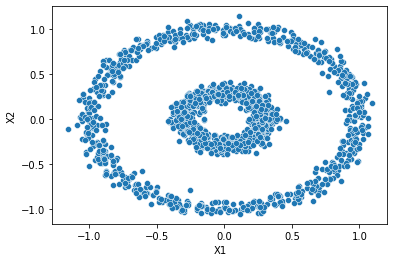

In [13]:
sns.scatterplot(data=circles,x='X1',y='X2')

In [72]:
def display(model,data):
    
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [15]:
from sklearn.cluster import KMeans

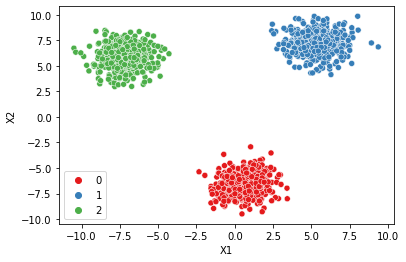

In [21]:
model = KMeans(n_clusters=3)
display(model,blobs)

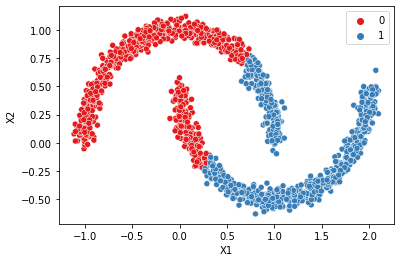

In [24]:
model = KMeans(n_clusters=2)
display(model,moons)


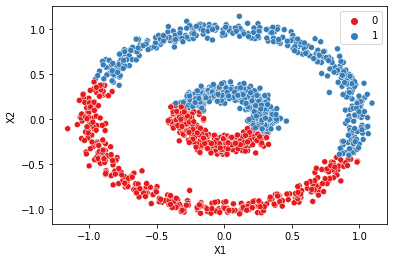

In [25]:
display(model,circles)

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
model = DBSCAN(eps=0.6)

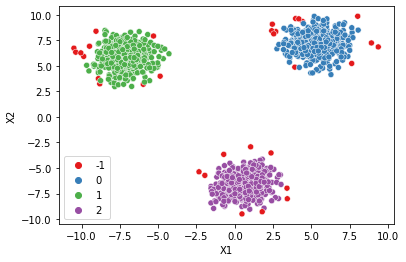

In [28]:
display(model,blobs)

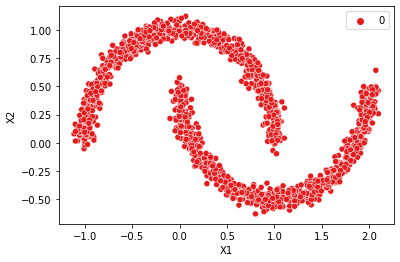

In [29]:
display(model,moons)

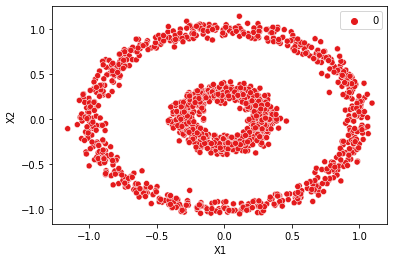

In [30]:
display(model,circles)

In [35]:
model = DBSCAN(eps=0.1)

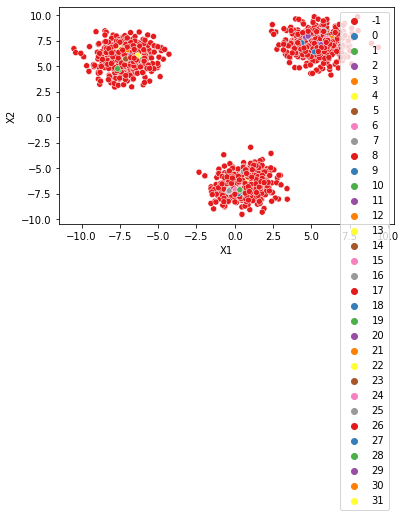

In [36]:
display(model,blobs)

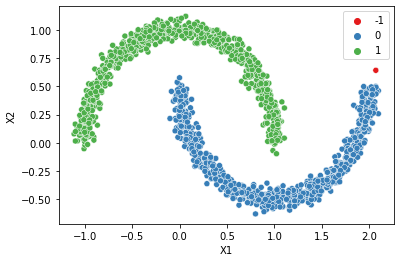

In [37]:
display(model,moons)

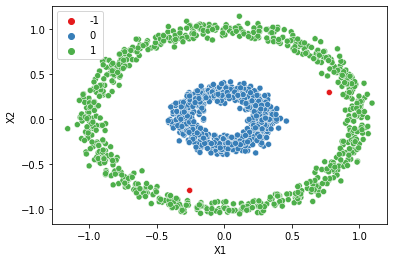

In [39]:
display(model,circles)

In [65]:
model = DBSCAN(eps=1,min_samples=3)

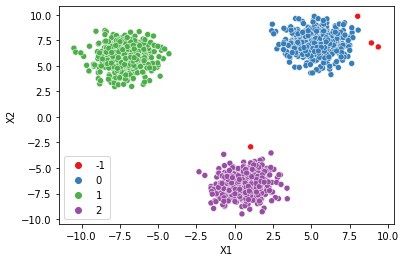

In [66]:
display(model,blobs)

In [67]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

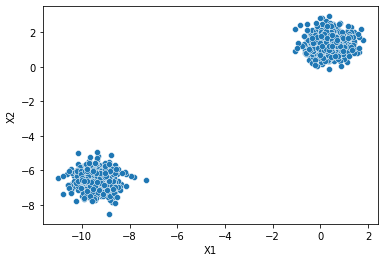

In [70]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<AxesSubplot:xlabel='X1', ylabel='X2'>

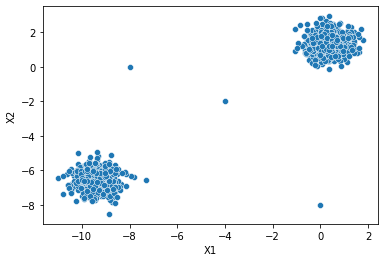

In [71]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [73]:
model = DBSCAN()

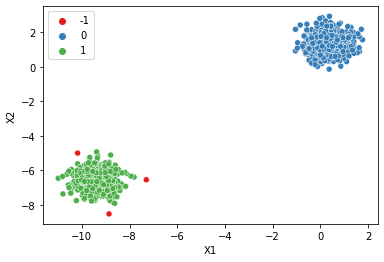

In [74]:
display(model,two_blobs)

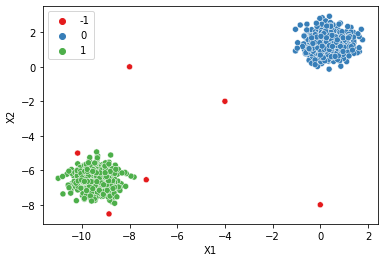

In [75]:
display(model,two_blobs_outliers)

In [76]:
model = DBSCAN(eps=1)

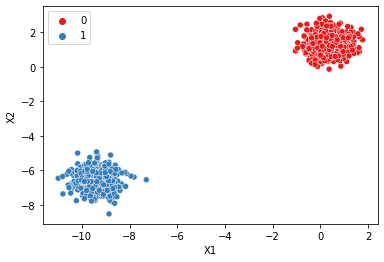

In [77]:
display(model,two_blobs)

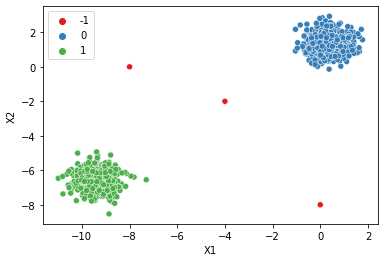

In [78]:
display(model,two_blobs_outliers)

In [80]:
model.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [81]:
model.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [84]:
np.sum(model.labels_ == -1)

3

In [88]:
np.sum(model.labels_ == -1)/len(model.labels_)*100

0.29910269192422734

In [91]:
labels = DBSCAN().fit_predict(two_blobs_outliers)

In [93]:
type(labels)

numpy.ndarray

In [94]:
outlierPer = []
outlierNum = []

for i in np.linspace(0.001,10,100):

    model = DBSCAN(eps=i)
    labels = model.fit(two_blobs_outliers)
    
    outlierNum.append(np.sum(model.labels_ == -1))
    per = np.sum(model.labels_ == -1)/len(model.labels_)*100
    outlierPer.append(per)

<AxesSubplot:>

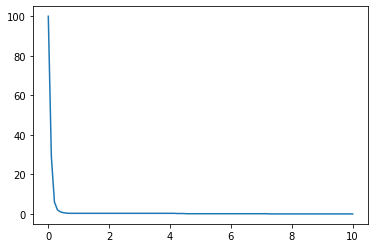

In [95]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlierPer)

<AxesSubplot:>

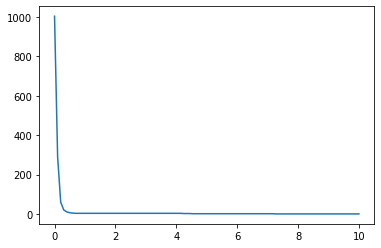

In [96]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlierNum)

(0.0, 1.0)

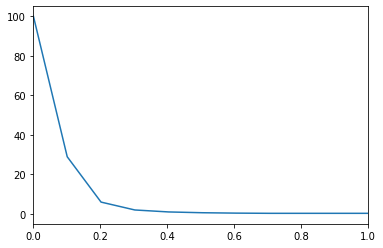

In [97]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlierPer)
plt.xlim(0,1)

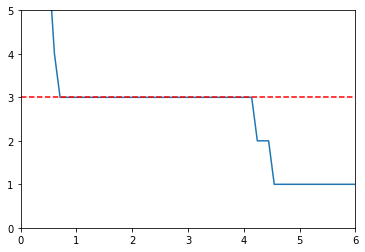

In [114]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlierNum)
plt.xlim(0,6)
plt.ylim(0,5)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

In [117]:
outlierPer = []

for i in np.arange(1,100):
    
    model = DBSCAN(min_samples=i)
    labels = model.fit(two_blobs_outliers)
    
    per = np.sum(model.labels_ == -1)/len(model.labels_)*100
    outlierPer.append(per)

<AxesSubplot:>

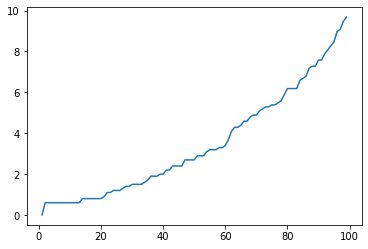

In [118]:
sns.lineplot(x=np.arange(1,100),y=outlierPer)

In [119]:
two_blobs_outliers.shape

(1003, 2)